# Ejercicios de optimización escalar Roberto Bruijnzeels 29/01

**Para la siguientes funciones encuentre los puntos críticos, grafique y diga si éste se trata de un máximo o mínimo, local o global.**

$f(x)=1260+117x-9x^2$

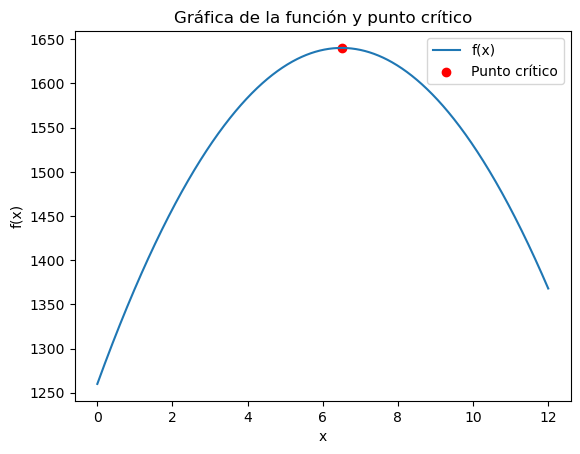

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 1260 + 117 * x - 9 * x**2


def f_prime(x):
    return 117 - 18 * x


punto_c = 117 / 18


x_values = np.linspace(0, 12, 1000)
y_values = f(x_values)


plt.plot(x_values, y_values, label='f(x)')
plt.scatter(punto_c, f(punto_c), color='red', label='Punto crítico')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función y punto crítico')
plt.legend()

plt.show()

$f(x)=5+x+\frac{4}{x}$, para $x>0$

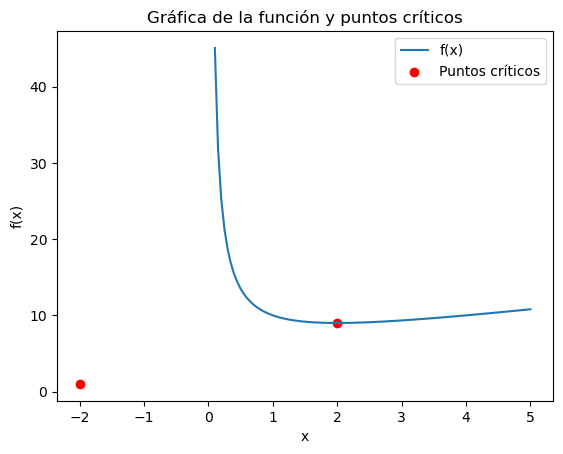

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x = sp.symbols('x')

f = 5 + x + 4 / x

f_prima = sp.diff(f, x)

punto_c = sp.solve(f_prima, x)

# Convertir los puntos críticos a valores numéricos
punto_c_e = [float(point) for point in punto_c if point.is_real]


x_values = np.linspace(0.1, 5, 100)  # Empezamos desde 0.1 para evitar división por cero
y_values = [f.subs(x, val) for val in x_values]


plt.plot(x_values, y_values, label='f(x)')

plt.scatter(punto_c_e, [f.subs(x, point) for point in punto_c_e], color='red', label='Puntos críticos')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función y puntos críticos')
plt.legend()
plt.show()

$f(x)=6-2x+\sqrt{18-2x^2}$, para $-3\leq x\leq 3$

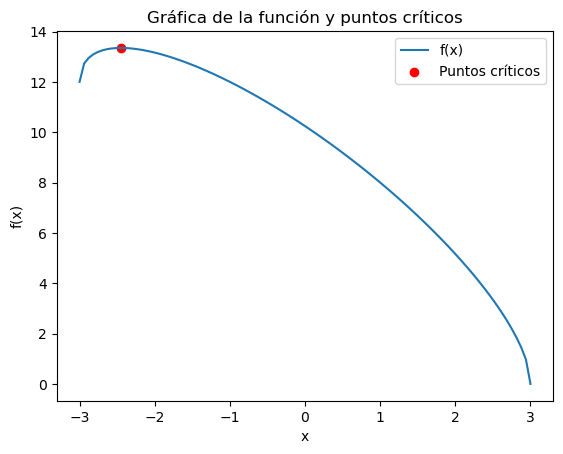

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x = sp.symbols('x')
f = 6 - 2*x + sp.sqrt(18 - 2*x**2)

# Calcular la derivada
f_prima = sp.diff(f, x)

# Resolver f'(x) = 0 para encontrar los puntos críticos
punto_c = sp.solve(f_prima, x)

punto_c_e = [float(point) for point in punto_c if point.is_real]

# Calcular la segunda derivada 
x_crit = -np.sqrt(6)
f_doble_prima = sp.diff(f_prima, x).subs(x, x_crit)

# Generar datos para la gráfica
x_values = np.linspace(-3, 3, 100)
y_values = [f.subs(x, val) for val in x_values]

plt.plot(x_values, y_values, label='f(x)')
plt.scatter(punto_c_e, [f.subs(x, point) for point in punto_c_e], color='red', label='Puntos críticos')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función y puntos críticos')
plt.legend()
plt.show()



$f(x)=\frac{1}{4}x^4+\frac{1}{3}x^3-x^2$ en el intervalo $[-3,1.7]$

---
**Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento.**

El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

In [10]:
import sympy as sp

# Definir variables
a, b = sp.symbols('a b', positive=True, real=True)

# Restricción del perímetro
restriccion_perimetro = 2*a + b - 10

# Expresar b en términos de a usando la restricción del perímetro
b_en_funcion_de_a = sp.solve(restriccion_perimetro, b)[0]

# Expresar la altura h en términos de a y b usando el teorema de Pitágoras
h = sp.sqrt(a**2 - (b/2)**2)

# Expresar el volumen V en términos de a y b
V = (1/3) * sp.pi * (b/2)**2 * h

# Sustituir b en términos de a en la fórmula del volumen
V_en_funcion_de_a = V.subs(b, b_en_funcion_de_a)

# Encontrar la derivada de V con respecto a a
V_prime = sp.diff(V_en_funcion_de_a, a)

# Resolver la ecuación V' = 0 para encontrar puntos críticos
puntos_criticos = sp.solve(V_prime, a)

# Evaluar los puntos críticos en la restricción del perímetro para obtener a y b
dimensiones_posibles = [(punto, b_en_funcion_de_a.subs(a, punto)) for punto in puntos_criticos]

# Mostrar los resultados
print("Posibles dimensiones para maximizar el volumen:")
for dimensiones in dimensiones_posibles:
    print(f"a = {dimensiones[0]}, b = {dimensiones[1]}")

Posibles dimensiones para maximizar el volumen:
a = 3.00000000000000, b = 4.00000000000000
a = 5.00000000000000, b = 0


Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?

In [15]:
import sympy as sp

x, y = sp.symbols('x y', positive=True, real=True)

restriccion_longitud = 2*x + 2*y - 6

y_en_funcion_de_x = sp.solve(restriccion_longitud, y)[0]

A = 2*x*y_en_funcion_de_x
A_prime = sp.diff(A, x)
puntos_criticos = sp.solve(A_prime, x)

dimensiones_optimas = [(punto, y_en_funcion_de_x.subs(x, punto)) for punto in puntos_criticos]
print("Dimensiones óptimas para maximizar el área:")
for dimensiones in dimensiones_optimas:
    print(f"x = {dimensiones[0]}, y = {dimensiones[1]}")

Dimensiones óptimas para maximizar el área:
x = 3/2, y = 3/2
